<a href="https://colab.research.google.com/github/AlexKalll/Unsupervised-Machine-Learning/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

files.download('Mall_customers.csv')  # Use the filename as it appears in the uploaded dictionary

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# prompt: import necccesay libraries to work with hierarchical clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df1 = df.iloc[:, 3:5]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
df1 = df.iloc[:, 3:5].values
df1[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

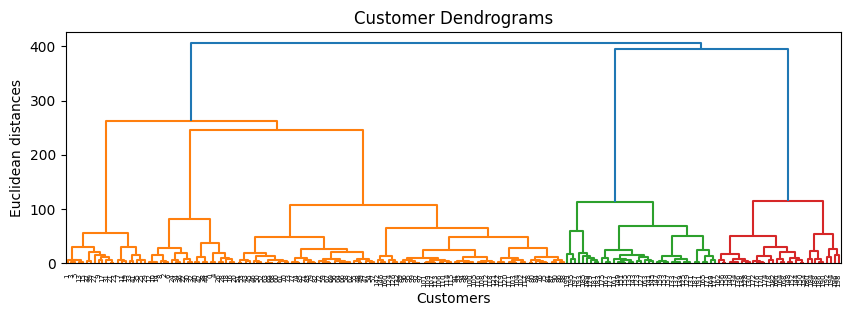

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (10, 3))
plt.title('Customer Dendrograms')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

dendrogram = sch.dendrogram(sch.linkage(df1, method = 'ward'))

# plt.show()

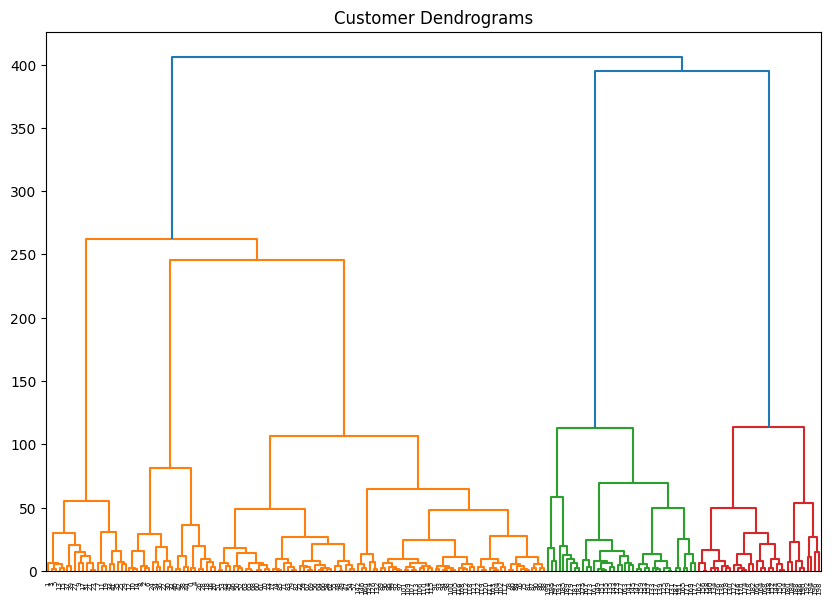

In [12]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (10, 7))
plt.title('Customer Dendrograms')
dend = sch.dendrogram(sch.linkage(df1, method = 'ward'))
# ward indicates that the method aims to minimize the variance within each cluster

In [45]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5, linkage='ward') # instance of the class agglo..
labels_ = model.fit_predict(df1)

In [46]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [47]:
print(set(labels_)) # n_clusters defines this i.e. we want to find 5 cluster in the data

{0, 1, 2, 3, 4}


In [48]:
from collections import Counter
cluster_dict = Counter(labels_)
cluster_counts = dict(sorted(cluster_dict.items()))

print('Total Data points: ', len(labels_))
print(f'Data on each cluster:')  # Use the calculated counts in the f-string
for cluster, count in cluster_counts.items():
    print(f'Cluster {cluster}: {count} data points')

Total Data points:  200
Data on each cluster:
Cluster 0: 32 data points
Cluster 1: 85 data points
Cluster 2: 39 data points
Cluster 3: 21 data points
Cluster 4: 23 data points


Text(0, 0.5, 'Spending Score')

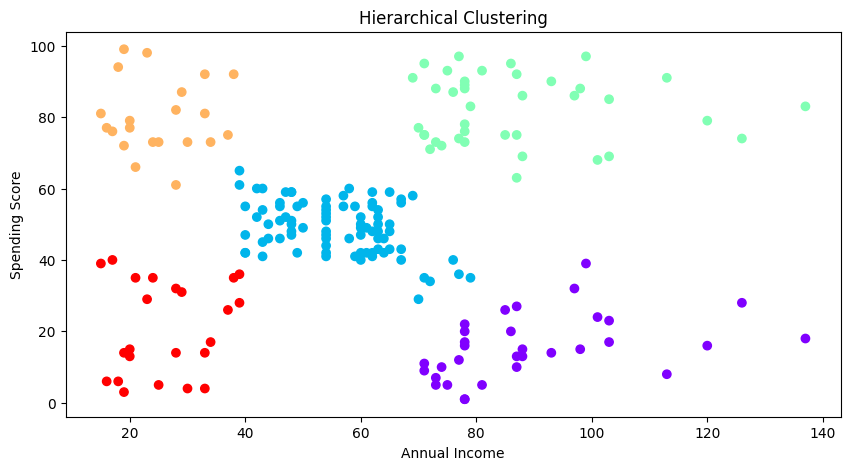

In [54]:
plt.figure(figsize = (10, 5))
plt.scatter(df1[:, 0], df1[:, 1], c = model.labels_, cmap = 'rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
# plt.show()

In [58]:
incomes = df['Annual Income (k$)'].values
scores = df['Spending Score (1-100)'].values
print(max(incomes)) # this helps to know the max range for the incomes range in the graph above
print(max(scores)) # and this also

137
99
